# Atelier : Introduction à PennyLane

### Durée : ~3h


PennyLane est une bibliothèque Python open source pour concevoir, simuler et exécuter des algorithmes quantiques et hybrides sur CPU, GPU, simulateurs ou ordinateurs quantiques, soutenue par une communauté active.

# Installation et importation

Pour installer PennyLane, utilisez simplement la commande :

```bash
pip install pennylane
```

Ensuite, dans votre environnement préféré (par exemple VSCode ou un notebook Jupyter), lancez ces deux instructions d'importation :

```python
import pennylane as qml
from pennylane import numpy as np
```

Vous êtes maintenant prêt à coder !

In [12]:
import pennylane as qml
from pennylane import numpy as np
from qiskit import QuantumCircuit

# import numpy as np

print(f"Version de PennyLane : {qml.__version__}")

Version de PennyLane : 0.41.1


# Hello World: Un premier exemple rapide avec PennyLane

Commençons directement avec un petit exemple complet, façon "Hello World" avec PennyLane.

Voici un premier circuit quantique minimal.


Résultat (probabilités) : [0.5 0.  0.  0.5]
(<Figure size 600x300 with 1 Axes>, <Axes: >)


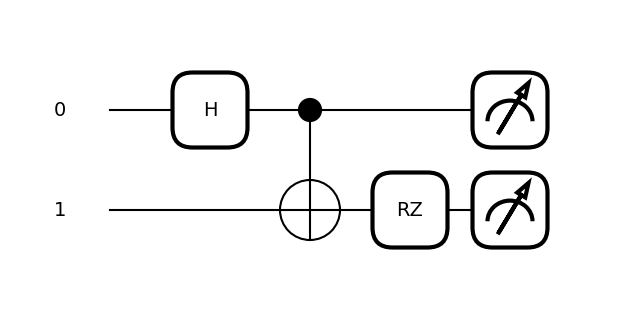

In [13]:
# Importer PennyLane
import pennylane as qml
from pennylane import numpy as np

# Définir un device : simulateur avec 2 qubits
dev = qml.device("default.qubit", wires=2)

# Définir le circuit : une fonction décorée avec @qml.qnode
@qml.qnode(dev)
def hello_circuit(param):
    qml.Hadamard(wires=0)           # Appliquer une porte Hadamard sur le qubit 0
    qml.CNOT(wires=[0, 1])           # Appliquer une porte CNOT (0 contrôle 1)
    qml.RZ(param, wires=1)           # Appliquer une rotation autour de Z sur le qubit 1 (avec un paramètre)
    return qml.probs(wires=[0, 1])   # Mesurer les probabilités sur les deux qubits

# Définir un paramètre
parametre = np.pi / 4

# Exécuter le circuit
resultat = hello_circuit(parametre)
print("Résultat (probabilités) :", resultat)

# Visualiser le circuit
print(qml.drawer.draw_mpl(hello_circuit)(parametre))

### Que fait ce code ?

- **Import** : On importe PennyLane et NumPy version compatible.
- **Device** : On utilise un simulateur (`default.qubit`) avec **2 qubits**.
- **QNode** : On définit un circuit avec une fonction Python décorée avec `@qml.qnode`.
- **Circuit** :
  - `Hadamard` : créer une superposition sur le qubit 0.
  - `CNOT` : créer de l'intrication (entanglement) entre le qubit 0 et le qubit 1.
  - `RZ(param)` : appliquer une rotation paramétrée autour de l'axe Z sur le qubit 1.
- **Paramètre** : On fournit un angle (`π/4`) pour la porte `RZ`.
- **Exécution** : On appelle la fonction avec le paramètre pour obtenir les probabilités.
- **Visualisation** : On dessine le circuit pour mieux le comprendre.

---

Dans les prochaines sections, nous allons **analyser chaque composant** :
- **Devices** : simulateurs et hardware
- **QNodes** : circuits comme fonctions
- **Portes quantiques** : manipulation des qubits
- **Paramètres** : création de circuits paramétriques
- **Mesures** : récupérer les résultats
- **Visualisation et exécution**


# Opérations quantiques

Dans PennyLane, un circuit quantique est construit à partir de différentes opérations :

- **Préparation d’état quantique** : initialiser les qubits dans un état spécifique comme `qml.StatePrep`, `qml.BasisState`.
- **Portes à un seul qubit** : appliquer des opérations comme X (`qml.PauliX` or `qml.X`), Y, Z, H, RX, RY, RZ, etc.
- **Portes multi-qubits** : opérations impliquant plusieurs qubits, comme CNOT, CZ, SWAP, etc.
- **Portes contrôlées** : appliquer une opération sur un qubit en fonction de l’état d’un autre (ex : CNOT).
- **Inverse d’une opération** : appliquer l’opération inverse d’une porte (ex : `qml.adjoint(qml.Hadamard)(wires=0)`).

Pour plus de détails et d’exemples :  
[Quantum Operations — PennyLane Codebook](https://pennylane.ai/codebook/pennylane-fundamentals/quantum-operations)

# Devices (Dispositifs Quantiques): simulateurs et hardware

Les [devices](https://docs.pennylane.ai/en/stable/code/api/pennylane.device.html) dans PennyLane représentent le backend où les circuits quantiques sont exécutés. Il peut s'agir d'un simulateur ou d'un matériel quantique réel.

La function `device(name, *args, **kwargs)` est utilisée pour charger un device spécifique, qui pourra ensuite être utilisé pour construire des `QNodes`.

Paramètres principaux :

- name (str) — le nom du device à charger

- wires (int) — le nombre de qubits à initialiser
(Remarque : Cet argument est optionnel pour certains devices comme default.qubit, car PennyLane peut parfois déduire automatiquement le nombre de fils.)


PennyLane propose plusieurs simulateurs intégrés, par exemple :

- `default.qubit` : Simulateur classique de qubits sans bruit.  

- `lightning.qubit` : Simulateur de qubits rapide et sans bruit, avec un backend en C++ pour de meilleures performances.

- `default.mixed` : Simulateur de qubits permettant de modéliser du **bruit**.  

- `default.tensor` : Simulateur de circuits quantiques basé sur les réseaux de tenseurs (tensor networks).

Pour plus d'informations, consultez la documentation officielle : [PennyLane Devices](https://docs.pennylane.ai/en/stable/code/api/pennylane.device.html)


**Notes importantes :**

Les dispositifs réels nécessitent parfois une authentification (example: token API IBM Quantum).

Les "Fake" backends sont pratiques pour tester vos circuits sans avoir à réserver du temps sur un vrai processeur quantique.

## Exemples:

In [14]:
dev_default = qml.device("default.qubit", wires=2)
dev_mixed = qml.device("default.mixed", wires=2, shots=1000)
dev_lightning = qml.device("lightning.qubit", wires=2, shots=1000)

print('Simulator default : ',dev_default)
print('Simulator mixed : ',dev_mixed)
print('Simulator lightning : ',dev_lightning)

Simulator default :  <default.qubit device (wires=2) at 0x1a52c2c5350>
Simulator mixed :  <default.mixed device (wires=2, shots=1000) at 0x1a52e9406e0>
Simulator lightning :  <lightning.qubit device (wires=2, shots=1000) at 0x1a52c201d30>


## Voir tous les dispositifs disponibles
Pour voir la liste des devices disponibles sur votre installation, vous pouvez utiliser la commande suivante `qml.about()`

In [15]:
qml.about()

Name: PennyLane
Version: 0.41.1
Summary: PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.
Home-page: https://github.com/PennyLaneAI/pennylane
Author: 
Author-email: 
License: Apache License 2.0
Location: C:\Users\user\Desktop\quantum-computing\.venv\Lib\site-packages
Requires: appdirs, autograd, autoray, cachetools, diastatic-malt, networkx, numpy, packaging, pennylane-lightning, requests, rustworkx, scipy, tomlkit, typing-extensions
Required-by: PennyLane-qiskit, PennyLane_Lightning

Platform info:           Windows-11-10.0.26100-SP0
Python version:          3.13.3
Numpy version:           2.2.5
Scipy version:           1.15.2
Installed devices:
- default.clifford (PennyLane-0.41.1)
- default.gaussian (PennyLane-0.41.1)
- default.mixed (PennyLane-0.41.1)
- default.qubit (PennyLane-0.41.1)
- default.qutrit (PennyLane-0.41.1)
- default.qutrit.mixed (PennyLane-0.

## Utiliser des devices supplémentaires avec des plugins
Il fuat savoir aussi que PennyLane prend également en charge de nombreux autres dispositifs via des plugins.

## Exemple : utiliser les backends IBM (réels et simulés)

In [16]:
# IBM real and fake backends
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeQuebec
# 1) un ordi reel
service = QiskitRuntimeService()
backend = service.backend("ibm_quebec")
dev_ibm_quebec = qml.device("qiskit.remote", wires=2, shots=1000, backend=backend, optimization_level=0)

# 2) Get a fake backend from the fake provider
backend = FakeQuebec()
dev_ibm_fakequebec = qml.device('qiskit.remote', wires=2, backend=backend, shots=1000, optimization_level=0)


## Flexibilité des `wires`
Par défaut, si vous spécifiez `wires=N`, PennyLane utilise les indices `0, 1, ..., N-1` pour identifier les sous-systèmes quantiques (qubits).
**MAIS :** Vous pouvez définir explicitement les **étiquettes** (labels) et l'**ordre** de ces `wires` en passant une **liste ou un tableau** à l'argument `wires` lors de la création du `device`.

Pour plus d'informations et d'exemples, voir le [Codebook - Circuits & QNodes](https://pennylane.ai/codebook/pennylane-fundamentals/circuits-and-qnodes/en)


# Circuit quantique (function quantique)

Un circuit quantique, ou fonction quantique, est une fonction Python qui contient une liste de portes pouvant dépendre de certains paramètres et agir sur des qubits (fils). Dans PennyLane, tous les qubits sont initialisés dans l'état de base $\ket{0}$.

Voici un exemple de fonction quantique de base :


In [17]:
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)


Ici, la porte `RX` dépend de l'angle de rotation `theta`, qui est spécifié en argument de la fonction `my_first_quantum_function`. Les qubits (ou fils) sont étiquetés par des entiers 0, 1, 2, etc. (comptage Python). Dans cet exemple, le circuit a deux qubits, étiquetés 0 et 1.

Dans PennyLane, une fonction quantique applique les portes dans l’ordre où elles apparaissent dans le code. Ainsi, la porte `RX` sera appliquée en premier, puis la porte `Hadamard`, sur le qubit spécifié `0`.

Ce circuit peut être visualisé ainsi :

(<Figure size 500x300 with 1 Axes>, <Axes: >)


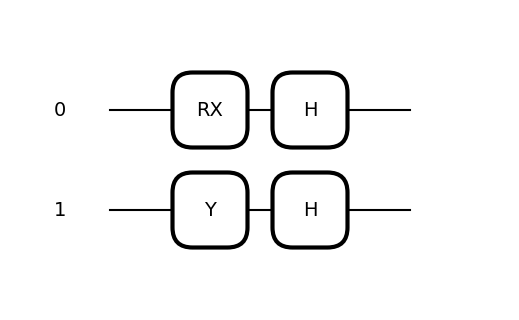

In [18]:
# Visualiser le circuit
print(qml.drawer.draw_mpl(my_first_quantum_function)(np.pi/2))

**Remarque importante :**  
Comme vous l’avez peut-être déjà deviné, cette fonction (ou circuit) **ne peut pas encore être exécutée**.  
En effet, il lui **manque deux éléments essentiels** :

1. **Une mesure** pour extraire un résultat ;
2. **Un device** (simulateur ou ordinateur quantique réel) auquel rattacher le circuit.

Nous verrons dans les prochaines étapes comment ajouter ces éléments pour rendre le circuit exécutable.  
Pour en savoir plus sur les devices, voir la section [Devices (Dispositifs Quantiques)](#devices-dispositifs-quantiques-simulateurs-et-hardware).


## Exercice 1: Creation de circuit

Utilisez PennyLane pour créer le circuit suivant dans la cellule ci-dessous.

<img src="images/quantum_circuit.png" alt="Quantum circuit" style="width:500px;"/>

Probabilities: [0.25 0.25 0.   0.   0.25 0.25 0.   0.  ]


(<Figure size 1000x400 with 1 Axes>, <Axes: >)

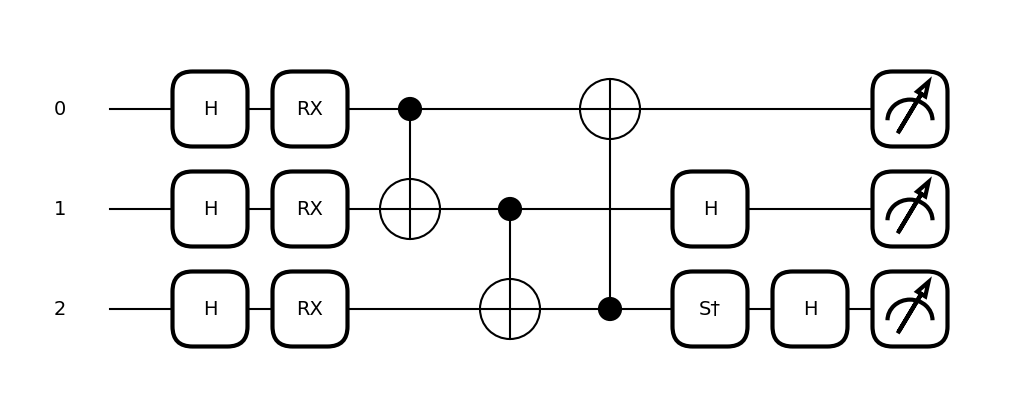

In [19]:
circuit_1 = qml.device("default.qubit", wires=3)
@qml.qnode(circuit_1)
def exo1(angles):
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    for i in range(3):
        qml.RX(angles[i], wires = i)
    for j in range(3):
        qml.CNOT(wires = [j, (j+1)%3])
    qml.Hadamard(wires = 1)
    qml.adjoint(qml.S(wires=2))
    qml.Hadamard(wires = 2)
    return qml.probs(wires=[0, 1, 2])
angles = [np.pi/2,np.pi/3,np.pi/4]
result = exo1(angles)
print("Probabilities:", result)

# Plot the circuit
qml.drawer.draw_mpl(exo1)(angles)

## Construire des circuits complexes en combinant plusieurs fonctions

Pour des circuits plus complexes, il est utile de découper le circuit en sous-parties (ou blocs logiques), chacune implémentée comme une fonction indépendante. Ces fonctions peuvent ensuite être appelées dans une fonction "mère" (ou principale), qui applique la mesure et retourne les résultats.

In [20]:
def encoding_layer(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)

def entangling_layer():
    qml.CNOT(wires=[0, 1])

def my_full_circuit(params):
    encoding_layer(params)
    entangling_layer()
    return qml.expval(qml.PauliZ(0))


In [21]:
params = np.array([0.1, 0.2])
print(qml.draw(my_full_circuit)(params))

0: ──RX(0.10)─╭●─┤  <Z>
1: ──RY(0.20)─╰X─┤     


### Circuit inversé avec `qml.adjoint` (Inverser un bloc de circuit)

PennyLane permet d’inverser une ou plusieurs opérations quantiques en utilisant `qml.adjoint(...)`. Cela inverse la ou les portes quantiques spécifiées, y compris celles qui dépendent de paramètres.

Cette fonctionnalité est utile dans plusieurs cas :
- Les *algorithmes d’amplification d’amplitude* (Grover-like),
- Lorsqu’on souhaite **restaurer un état quantique initial** après une manipulation.


#### Exemple : inversion d’un circuit défini par sous-fonctions

In [22]:
def encoding_layer(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)

def entangling_layer():
    qml.CNOT(wires=[0, 1])

def my_full_circuit(params):
    encoding_layer(params)
    entangling_layer()
    
    qml.Barrier(wires=[0, 1]) # ajouter une barrière de séparation

    # Inverser tout ce qui précède :
    qml.adjoint(entangling_layer)()
    qml.adjoint(encoding_layer)(params)

    return qml.expval(qml.PauliZ(0))

In [23]:
params = [np.pi/4, np.pi/3]
print(qml.draw(my_full_circuit)(params))

0: ──RX(0.79)─╭●─╭||─╭X†──RX(0.79)†─┤  <Z>
1: ──RY(1.05)─╰X─╰||─╰X†──RY(1.05)†─┤     


Ici, le circuit applique une couche d'encodage suivie d’un enchevêtrement, **puis annule** les opérations dans l’ordre inverse.  
L’état quantique final devrait donc être (idéalement) identique à l’état initial — sauf si le circuit inclut du bruit, auquel cas l’inversion ne restaurera pas parfaitement l’état initial.

## Exercice 2 : Circuit quantique complexe

Créer un circuit avec **3 qubits**.

1. Appliquer une **couche d'initialisation** mettant tous les qubits en superposition.
2. Construire une **couche répétée `n` fois** (ici `n = 3`). Chaque couche contient :
   - Une **sous-couche de rotations** : appliquer successivement `RX` (pi/2), `RY` (pi/4) et `RZ` (Dynamique - utilise le i-ème paramètre) sur chaque qubit.
   - Une **sous-couche d’intrication** : appliquer `CZ` entre les qubits (0,1) et (1,2).
   - Une **barrière** pour délimiter visuellement les étapes (optionnelle).
3. Ajouter **l’inverse du circuit** (mêmes portes dans l’ordre inverse).
4. Effectuer une **mesure** avec `qml.counts()`.

**Objectif :** Vérifiez le résultat — vous devriez retrouver uniquement l’état `|000⟩`, car le circuit appliqué suivi de son inverse ramène les qubits à leur état initial.

Probabilities: {np.str_('000'): np.int64(1000)}


(<Figure size 4200x400 with 1 Axes>, <Axes: >)

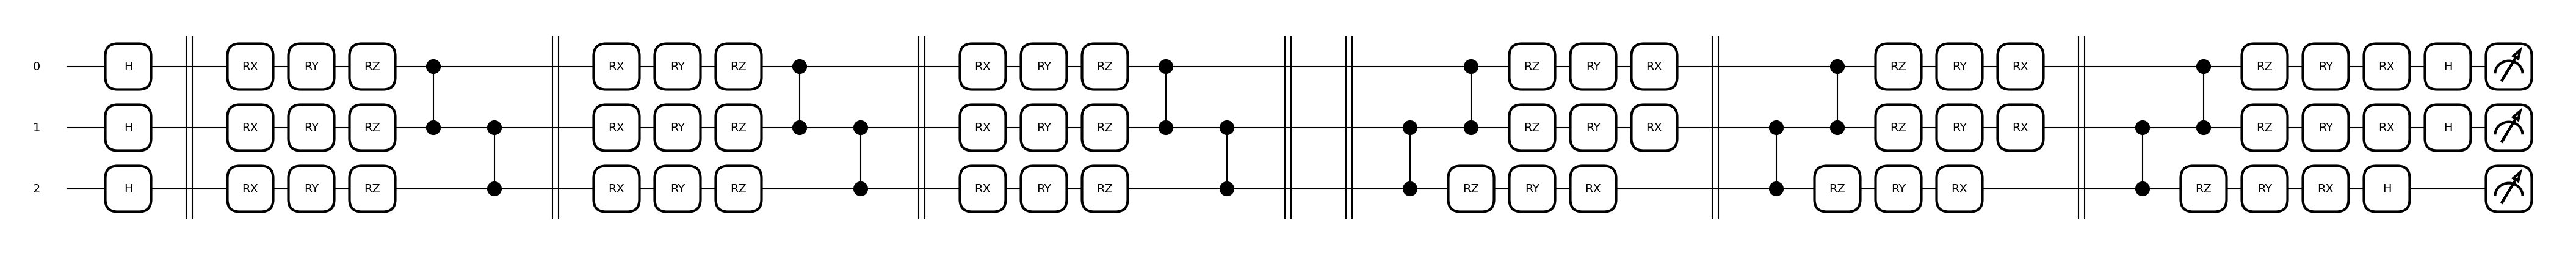

In [24]:
circuit_2 = qml.device("default.qubit", wires=3, shots=1000)

def initialise():
    for i in range(3):
        qml.Hadamard(wires=i)
def iteration(n, params):
    for i in range(n):
        for j in range(3):
            qml.RX(np.pi/2,wires=j)
            qml.RY(np.pi/4,wires=j)
            qml.RZ(params[i],wires=j)

        qml.CZ([0,1])
        qml.CZ([1,2])
        qml.Barrier()
def reverse_iterate(n, params):
    for i in reversed(range(n)):
        qml.Barrier(wires=[0, 1, 2])
        qml.CZ(wires=[1, 2])
        qml.CZ(wires=[0, 1])
        for j in reversed(range(3)):
            qml.RZ(-params[i], wires=j)
            qml.RY(-np.pi/4, wires=j)
            qml.RX(-np.pi/2, wires=j)

@qml.qnode(circuit_2)
def assemble(n, params):
    initialise()
    qml.Barrier()
    iteration(n, params)
    reverse_iterate(n, params)
    initialise()
    return qml.counts(wires=[0, 1, 2])

params = [np.pi/2,np.pi/3,np.pi/4]
result = assemble(3, params)
print("Probabilities:", result)

# Plot the circuit
qml.drawer.draw_mpl(assemble)(3, params)

# Exécution via QNode (`qml.QNode`)

Dans PennyLane, un [QNode](https://docs.pennylane.ai/en/stable/code/api/pennylane.QNode.html) (Quantum Node) est un objet qui encapsule un circuit quantique et le dispositif (simulateur ou matériel réel) sur lequel il est exécuté.

C’est ce qui permet d’exécuter un circuit et de récupérer les resultats mesurée.


Deux méthodes pour créer un QNode :


## 1. Instanciation explicite (`qml.QNode(...)`)

Cette méthode donne plus de contrôle sur la création du circuit.

In [25]:

dev = qml.device("default.qubit", wires=2) # Définir le device (simulateur)

# Définir la fonction quantique (sans décorateur ici)
def my_quantum_circuit(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))


qnode = qml.QNode(my_quantum_circuit, dev) # Créer le QNode explicitement

# Exécuter
result = qnode(np.pi / 2)
print(f"Résultat : {result}")

Résultat : 0.0


**Avantages** :
- Plus flexible (on peut créer dynamiquement plusieurs QNodes avec différents devices).
- Adapté aux projets plus complexes.

## 2. Approche par décorateur (`@qml.qnode`)

Méthode plus concise et pythonique, idéale pour les cas simples ou pédagogiques.

In [26]:
dev = qml.device("default.qubit", wires=2) # Définir le device

# Ajouter le décorateur sur la fonction
@qml.qnode(dev)
def my_quantum_circuit(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))

# Exécuter
result = my_quantum_circuit(np.pi / 2)
print(f"Résultat : {result}")

Résultat : 0.0


**Avantages** :
- Syntaxe claire et directe.
- Idéal pour notebooks interactifs et démonstrations.

### Remarque :

Peu importe la méthode choisie, une **fonction quantique (circuit)** devient exécutable uniquement une fois qu’elle est associée à un QNode.

QNode est le mécanisme standard pour rendre un circuit exécutable et différentiable dans PennyLane.

### Pour aller plus loin : QNode et graphes computationnels hybrides (optionnel)
Pour ceux qui souhaitent approfondir leur compréhension.

Un QNode est appelé ainsi car il représente un nœud (node) dans un graphe computationnel hybride combinant calculs classiques et quantiques. le QNode reçoit des entrées (paramètres), effectue des calculs quantiques, puis transmet les résultats à d'autres composants du système, facilitant ainsi l'intégration transparente entre les parties classiques et quantiques d'un algorithme.

## Exercice 3 : QNode
Créer un circuit quantique simple avec 2 qubits (par ex. H + CNOT + mesure), l'exécuter sur trois types de device en utilisant les deux methods de creation de QNode.

Device à utiliser :
- default.qubit — simulateur sans bruit
- ibmq.quebec — backend réel (optionnel). Si indisponible, utiliser FakeQuebec

In [27]:
from qiskit_aer import AerSimulator

# Backend simulé
simulator = AerSimulator.from_backend(FakeQuebec())
device1 = qml.device("qiskit.aer", backend=simulator, wires=2, shots=1000)
device2 = qml.device("default.qubit", wires=2)

def exo3_explicite():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))
circuit_3 = qml.QNode(exo3_explicite, device1)
print(f"Résultat : {circuit_3()}")

@qml.qnode(device1)
def exo3_decorator():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))
result = exo3_decorator()
print(f"Résultat : {result}")

Résultat : -0.028
Résultat : 0.042


## Diffusion des paramètres (Parameter Broadcasting)

Les **QNodes** peuvent être exécutés **simultanément** pour plusieurs configurations de paramètres.  
Ce mécanisme s’appelle la **diffusion de paramètres** (*parameter broadcasting* ou *parameter batching*).

Considérons ce circuit à un seul qubit :

In [28]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=0)
    return qml.expval(qml.Z(0))


Si l’on souhaite exécuter ce circuit pour **plusieurs valeurs de `x`**,  
il suffit de les passer sous forme d’un **tableau unidimensionnel** :

In [29]:
x = np.array([np.pi / 6, np.pi * 3 / 4, np.pi * 7 / 6])
results = circuit(x)
print(results)

[ 0.8660254  -0.70710678 -0.8660254 ]


Les **résultats** sont automatiquement **regroupés** dans un seul tableau (`np.array`).
- Mais surtout :  
  **PennyLane exécute les 3 cas en une seule simulation du circuit** (si le backend le permet),  plutôt que 3 exécutions séparées. 

Pour aller plus loin sur les cas compatibles et les limites :  
[Voir la documentation officielle sur le parameter broadcasting](https://docs.pennylane.ai/en/stable/code/api/pennylane.qnode.html#parameter-broadcasting)

## Construction & exécution de circuits avec `QuantumScript` et `qml.execute`

Au lieu de passer par un **QNode**, on peut directement construire une **liste d’opérations quantiques** (`Operator`) et créer un objet `QuantumScript` pour l’exécuter.

*Cette méthode est plus proche de ce qu’on retrouve dans d'autres frameworks comme **Qiskit**, et elle offre **plus de flexibilité** dans la manipulation des circuits.*



### Qu’est-ce qu’un `QuantumScript` ?

Un `QuantumScript` est une représentation explicite d’un circuit quantique à exécuter :

- Il **contient une séquence d’opérations** (`qml.RX`, `qml.CNOT`, etc.).
- Il **spécifie les mesures** à effectuer (`qml.expval`, `qml.counts`, etc.).
- Il peut aussi **inclure des paramètres** et le nombre de *shots*.


Une fois `QuantumScript` créé, il peut être exécuté manuellement via `qml.execute`


In [30]:
import pennylane as qml
from pennylane.tape import QuantumScript
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2, shots=1000) # 1) Définir le device

# 2) Construire la liste d'opérations
operations = []
operations.append(qml.Hadamard(wires=0))
operations.append(qml.CNOT(wires=[0, 1]))
operations.append(qml.RZ(np.pi / 4, wires=1))

## plus simple
# operations = [qml.Hadamard(wires=0), qml.CNOT(wires=[0, 1]), qml.RZ(np.pi / 4, wires=1)]

# 3) Définir la mesure (ici, on veut les comptes)
measurements = [qml.counts(wires=[0, 1])]

# 4) Créer le QuantumScript (spécifier les shots)
qscript = QuantumScript(operations, measurements, shots=1000)

# 5) Exécuter en batch (ici un seul circuit)
results = qml.execute([qscript], dev)

print(results)  # renvoie une liste de résultats  ([qml.execute — PennyLane 0.41.0 documentation](https://docs.pennylane.ai/en/stable/code/api/pennylane.execute.html))


({np.str_('00'): np.int64(485), np.str_('11'): np.int64(515)},)


Dans cette exemple, on a:
- **List d'operations** : liste d’objets `qml.operation.Operator`.  
- **measurements** : liste d’objets `qml.measure.M` (ici `qml.counts`).  
- **QuantumScript** assemble ces deux éléments et le nombre de *shots*.  
- **qml.execute** exécute le batch de scripts sur le device, en une seule passe si le backend le supporte  ([qml.execute — PennyLane 0.41.0 documentation](https://docs.pennylane.ai/en/stable/code/api/pennylane.execute.html)).

**Quand utiliser QuantumScript+execute ?** 
- Construction dynamique : manipulez librement la liste d’opérations avant de créer le QuantumScript (ajout, suppression, inversion, ), puis passez-la à QuantumScript pour verrouiller le circuit et l’exécuter.
- Pour des **batchs** de circuits très variés ou dynamiques.  
- Pour **inspecter** ou **transformer** les circuits avant exécution.  
- Lorsqu’on veut gérer manuellement le **workflow** d’exécution (caching, custom gradients).

Note : un QuantumScript est immutable après son initialisation ; on ne peut pas modifier ses opérations ou mesures une fois qu’il est créé


### Pour aller plus loin

- [`QuantumScript`](https://docs.pennylane.ai/en/stable/code/api/pennylane.tape.QuantumScript.html)
- [`qml.execute()`](https://docs.pennylane.ai/en/stable/code/api/pennylane.execute.html)
- [`QuantumTape` versus `QuantumScript`](https://docs.pennylane.ai/en/stable/code/qml_tape.html#tape-vs-script)


## Exercice 4 : exécution en batch

À l’aide de `QuantumScript`, créez 4 circuits correspondant aux 4 états de Bell.  
Exécutez-les tous en une seule fois avec `qml.execute`, puis affichez les résultats.

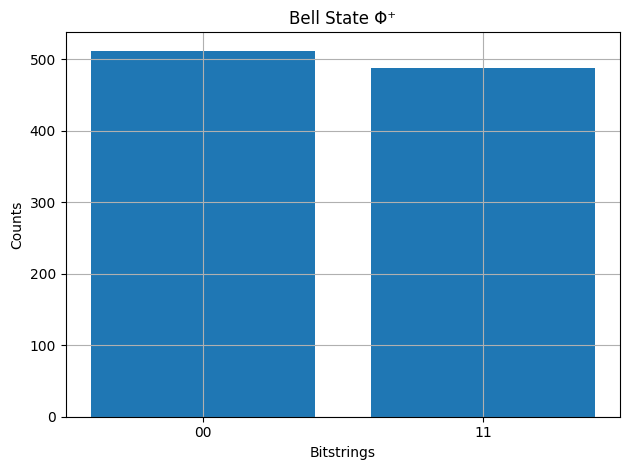

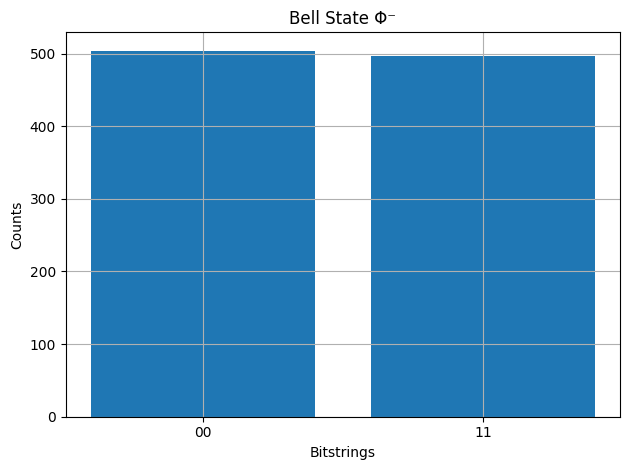

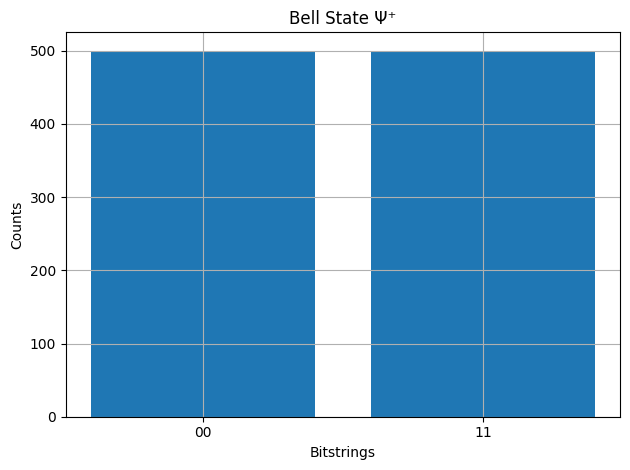

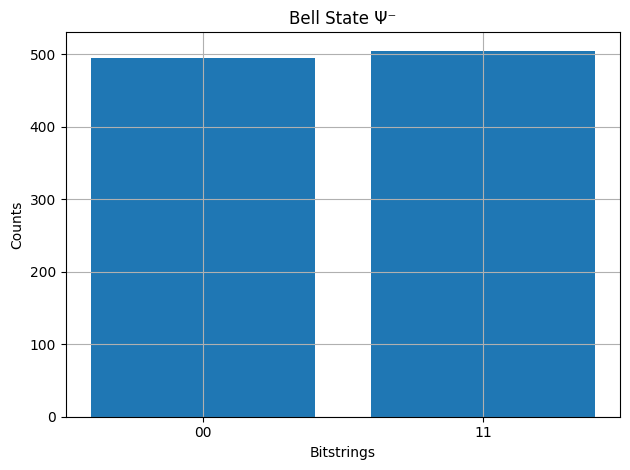

In [32]:
dev = qml.device("default.qubit", wires=2, shots=1000)

# 2. Définir la mesure
measurements = [qml.counts(wires=[0, 1])]

# 3. Définir les 4 circuits Bell avec leurs opérations
bell_scripts = []

# Bell Φ⁺ = (|00⟩ + |11⟩)/√2
ops_phi_plus = [
    qml.Hadamard(wires=0),
    qml.CNOT(wires=[0, 1])
]
bell_scripts.append(QuantumScript(ops_phi_plus, measurements, shots=1000))

# Bell Φ⁻ = (|00⟩ − |11⟩)/√2
ops_phi_minus = [
    qml.Hadamard(wires=0),
    qml.CNOT(wires=[0, 1]),
    qml.PauliZ(wires=0)
]
bell_scripts.append(QuantumScript(ops_phi_minus, measurements, shots=1000))

# Bell Ψ⁺ = (|01⟩ + |10⟩)/√2
ops_psi_plus = [
    qml.PauliX(wires=0),
    qml.Hadamard(wires=0),
    qml.CNOT(wires=[0, 1])
]
bell_scripts.append(QuantumScript(ops_psi_plus, measurements, shots=1000))

# Bell Ψ⁻ = (|01⟩ − |10⟩)/√2
ops_psi_minus = [
    qml.PauliX(wires=0),
    qml.Hadamard(wires=0),
    qml.CNOT(wires=[0, 1]),
    qml.PauliZ(wires=0)
]
bell_scripts.append(QuantumScript(ops_psi_minus, measurements, shots=1000))

# 4. Exécution en batch
results = qml.execute(bell_scripts, dev)
import matplotlib.pyplot as plt
# 5. Affichage des résultats
bell_names = ["Φ⁺", "Φ⁻", "Ψ⁺", "Ψ⁻"]
for name, counts in zip(bell_names, results):
    plt.figure()
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Bell State {name}")
    plt.xlabel("Bitstrings")
    plt.ylabel("Counts")
    plt.grid(True)
    plt.tight_layout()
plt.show()

# La Mesure

Un circuit quantique se termine en général par une mesure : c’est à ce moment qu’on récupère de l’information classique à partir de l’état quantique.
Dans PennyLane, on ajoute les mesures avec l’instruction `return` à la fin de la fonction quantique, ou directement dans un QuantumScript, comme on l’a vu plus tôt.

Il existe plusieurs types de mesures, chacune donnant un type d'information différent. On peut les classer en deux grandes catégories :

- 1) Mesures Statistiques (basées sur les shots): Simulent l'exécution répétée du circuit, comme sur du matériel réel. Nécessitent que le device soit configuré avec shots > 0. Les résultats sont aléatoires et convergent vers les vraies probabilités avec un grand nombre de shots.

    + `qml.sample()`: Retourne une liste brute des résultats de chaque shot.

    + `qml.counts()`: Retourne un dictionnaire résumant le nombre de fois où chaque résultat a été obtenu.

- 2) Mesures Analytiques (souvent shots=None): Calculent le résultat exact basé sur l'état quantique final (si le simulateur le permet). Ne nécessitent généralement pas de shots. Les résultats sont déterministes.

    + `qml.state()`: Retourne le vecteur d'état quantique complet (pour simulateurs d'état).
  
    + `qml.probs()`: Retourne les probabilités pour chaque état de base.

    + `qml.expval(Observable)`: Retourne la valeur moyenne (espérance) d'un observable donné.  



**Mesure en base computationnelle** : Si aucun observable n'est fourni, la mesure se fait dans la base ∣0⟩,∣1⟩.

**Mesure d’un observable** :  
Si un observable est fourni (ex : `qml.PauliX(0)`), PennyLane applique automatiquement les rotations nécessaires pour mesurer dans la base de cet observable et renvoie les valeurs propres (±1 pour les opérateurs de Pauli) mesurées à chaque shot.

Les fonctions quantiques peuvent retourner des mesures combinées de plusieurs observables.  
Si les observables ne commutent pas, plusieurs exécutions du circuit peuvent être nécessaires en arrière-plan.

Explorons les plus courantes avec des exemples. Préparons un device pour les exemples statistiques (shots > 0) et un pour les exemples analytiques (shots=None) :


In [33]:
import pennylane as qml
from pennylane import numpy as np

# Device pour mesures statistiques (échantillonnage)
dev_stat = qml.device("default.qubit", wires=2, shots=1024)

# Device pour mesures analytiques (calculs exacts)
dev_analytic = qml.device("default.qubit", wires=2) # shots=None par défaut

print(dev_stat)
print(dev_analytic)

<default.qubit device (wires=2, shots=1024) at 0x1a5c99713d0>
<default.qubit device (wires=2) at 0x1a5c9f89610>


## Mesures Statistiques : qml.sample et qml.counts
Sur un ordinateur quantique réel, chaque exécution du circuit (appelée un **shot**) donne un résultat aléatoire. Pour obtenir des statistiques fiables, on répète donc le circuit plusieurs fois et on collecte tous les résultats.

Dans PennyLane, cela se fait grâce à deux fonctions principales :
- `qml.sample()`: d’obtenir la liste brute des résultats
- `qml.counts()` : permet de compter combien de fois chaque résultat apparaît.


### `qml.sample()` : Obtenir les échantillons bruts. 
`qml.sample()` renvoie directement la liste des résultats obtenus pour chaque shot.

In [34]:
@qml.qnode(dev_stat)
def circuit_sample_basis():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    
    return qml.sample(wires=[0, 1]) # Mesure les deux qubits dans la base computationnelle

samples_basis = circuit_sample_basis()
print(f"Premiers 10 échantillons (base computationnelle): {samples_basis[:10]}")
# Attendu : ~50% [0, 0] et ~50% [1, 1]

Premiers 10 échantillons (base computationnelle): [[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


Voici un exemple avec la mesure d’un observable `qml.PauliZ(0)` :  
*(On s’attend à obtenir environ 50 % de +1 et 50 % de -1, car l’état préparé est \(|+\rangle\)).*


In [35]:
@qml.qnode(dev_stat)
def circuit_sample_observable():
    qml.Hadamard(wires=0)
    
    return qml.sample(qml.PauliZ(0)) # Mesure l'observable Pauli Z sur le qubit 0

samples_z0 = circuit_sample_observable()
print(f"\nPremiers 10 échantillons (Observable Z0): {samples_z0[:10]}")


Premiers 10 échantillons (Observable Z0): [ 1. -1. -1. -1.  1. -1. -1. -1.  1. -1.]


On peut aussi mesurer des observables tensoriels

In [36]:
@qml.qnode(dev_stat)
def circuit_sample_tensor():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1]) # Etat |00> + |11>
    
    return qml.sample(qml.PauliZ(0) @ qml.PauliZ(1)) # Mesure Z sur qubit 0 ET Z sur qubit 1 (Z0 @ Z1)

samples_zz = circuit_sample_tensor()
print(f"\nPremiers 10 échantillons (Observable Z0@Z1): {samples_zz[:10]}")
# Attendu : Toujours +1 car les mesures de Z0 et Z1 sont corrélées (soit +1*+1=1, soit -1*-1=1)


Premiers 10 échantillons (Observable Z0@Z1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\user\Desktop\quantum-computing\.venv\Lib\site-packages\pennylane\ops\op_math\composite.py:209: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


## `qml.counts()` : 
Pour un grand nombre de shots, qml.sample devient lourd. qml.counts est plus pratique : il renvoie un dictionnaire indiquant combien de fois chaque résultat unique a été obtenu.

Dans l'exemple suivant, on va retouner plusisuer type mesure a la fois.

In [37]:
@qml.qnode(dev_stat)
def circuit_counts_basis():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    
    return qml.counts(), qml.counts(wires=[0]), qml.counts(op=qml.PauliZ(0)@qml.PauliX(1))

counts = circuit_counts_basis()
print(f"Comptes (base computationnelle): {counts[0]}")
print(f"Comptes (base computationnelle) qubit 0: {counts[1]}")
print(f"Comptes (Observable Z0@X1): {counts[2]}")


Comptes (base computationnelle): {np.str_('00'): np.int64(506), np.str_('11'): np.int64(518)}
Comptes (base computationnelle) qubit 0: {np.str_('0'): np.int64(506), np.str_('1'): np.int64(518)}
Comptes (Observable Z0@X1): {np.float64(-1.0): np.int64(494), np.float64(1.0): np.int64(530)}


## Mesures Analytiques et/ou Statistiques : `qml.probs` et `qml.expval`

Avec `shots=None` (simulateur), ces mesures donnent des résultats exacts.  
Sur un vrai appareil ou avec `shots > 0`, elles deviennent des estimations statistiques basées sur un nombre fini de mesures (shot noise).

- `qml.probs()` donne la distribution de probabilité sur les états mesurés.
- `qml.expval()` donne la valeur moyenne (espérance) d’un observable.

Des explications et exemples détaillés suivent dans les sous-sections.

### `qml.probs()` : Obtenir les probabilités

`qml.probs()` retourne la distribution de probabilité sur les états de base (computationnels) ou sur les valeurs d’un observable.

- Sur des wires, elle donne la proba de chaque état de base (ex : |0>, |1>, |00>, |11>, etc.).
- Sur un observable à deux valeurs (ex : PauliZ), elle donne la proba d’obtenir +1 ou -1.  

In [38]:
@qml.qnode(dev_analytic)
def circuit_probs_basis():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1]) # Etat |00> + |11>
    
    return qml.probs(wires=0), qml.probs(wires=[0, 1])

probs_basis = circuit_probs_basis()
print(f"Probabilités (base computationnelle q0 |0>,|1>): {probs_basis[0]}")
print(f"Probabilités (base computationnelle |00>,|01>,|10>,|11>): {probs_basis[1]}")

Probabilités (base computationnelle q0 |0>,|1>): [0.5 0.5]
Probabilités (base computationnelle |00>,|01>,|10>,|11>): [0.5 0.  0.  0.5]


### `qml.expval(Observable)` : Obtenir la valeur moyenne (Expectation Values)

Les **valeurs moyennes**, ou **valeurs d’espérance**, sont l’un des types de mesures les plus utilisés en informatique quantique, notamment pour l’**optimisation** et le **machine learning**.  

Les valeurs d’espérance (expval) sont calculées de manière analytique et déterministe : elles fournissent un résultat exact sans être affectées par le bruit de l’échantillonnage.

**Rappel théorique :** Si on a un **état quantique** $|\psi\rangle$ et un **observable** représenté par l’opérateur $\hat{O}$, alors la **valeur moyenne** de cette mesure est donnée par :

$$\langle \hat{O} \rangle = \langle \psi | \hat{O} | \psi \rangle$$

Cela nous donne une estimation **déterministe** (non aléatoire) du résultat moyen qu'on obtiendrait si on mesurait plusieurs fois le même état.


Prenons un exemple simple. On prépare un circuit quantique dans lequel on applique une porte **X** (NOT) sur le **deuxième qubit**.  
Puis, on mesure l’observable **Pauli-Z** sur le **premier qubit**.

**Question** : Quelle est la valeur moyenne attendue de $Z$ pour le premier qubit ?  
Réponse : l’état initial est $|0\rangle$, donc :

$$\langle Z \rangle = \langle 0 | \hat{Z} | 0 \rangle = 1$$

Vérifions cela dans PennyLane :


In [39]:
@qml.qnode(dev_analytic)
def simple_circuit_expval():
    qml.H(wires=0)  # On applique X sur le 2e qubit (qubit 1)
    return qml.expval(qml.PauliZ(0))  # Mesure de Z sur le 1er qubit (qubit 0)

# Exécution du circuit
simple_circuit_expval()

np.float64(0.0)

### Rappel sur `expval` et `shots`:
Si vous utilisez qml.expval avec un device qui a des shots > 0, PennyLane calculera la valeur moyenne à partir des échantillons recueillis (en moyennant les valeurs propres (\pm 1) obtenues), plutôt que de faire le calcul analytique exact. Cela simule l'estimation d'une valeur moyenne sur du vrai matériel.

In [40]:
@qml.qnode(dev_stat) # Utilise le device avec shots=1024
def simple_circuit_expval():
    qml.H(wires=0) 
    return qml.expval(qml.PauliZ(0))  # Théoriquement <+|Z|+> = 0

expval_sampled = simple_circuit_expval()
print(f"\nValeur moyenne de Z0 (état |+>) estimée avec {dev_stat.shots} shots: {expval_sampled:.3f}")
# Attendu : Une valeur proche de 0, mais probablement pas exactement 0 à cause de l'échantillonnage.


Valeur moyenne de Z0 (état |+>) estimée avec Shots(total=1024) shots: -0.004


### `qml.state()` : Obtenir le vecteur d'état complet

Parfois, notamment pour le débogage ou l'analyse théorique, il est utile d'accéder directement au **vecteur d'état quantique** final du système. Il s'agit de l'état tel qu'il est juste **après l'application de toutes les opérations (portes) définies dans le circuit**, mais *avant* qu'une mesure au sens physique (projection) ne soit simulée. C'est ce que permet `qml.state()`.

Il est crucial de comprendre que `qml.state()` fournit une **"photographie" mathématique complète** de cet état final. Ce n'est pas une mesure au sens strict de la projection quantique (qui donne un résultat probabiliste et peut modifier l'état), mais plutôt un **accès direct à la description mathématique** de l'état lui-même.


Cette fonction n'est disponible que sur les simulateurs capables de calculer et de retourner le vecteur d'état complet (comme `"default.qubit"`). Elle ne fonctionnera pas sur du matériel réel ni sur certains types de simulateurs (par exemple, ceux basés uniquement sur l'échantillonnage).

**Aucun `shots` ou observable requis :** C'est un calcul analytique direct de l'état final.


In [41]:

# On utilise le device analytique (dev_analytic, 2 qubits) défini précédemment
@qml.qnode(dev_analytic)
def circuit_get_state():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1]) # Crée l'état de Bell |Φ⁺> = (|00> + |11>)/sqrt(2)
    # Retourne le vecteur d'état final
    return qml.state()

final_state_vector = circuit_get_state()

print(f"\nVecteur d'état final (pour |Φ⁺>):")
print(final_state_vector)
# Attendu : [0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j]
# (correspondant aux amplitudes pour |00>, |01>, |10>, |11>)

print(f"Norme au carré (vérification) : {np.sum(np.abs(final_state_vector)**2):.2f}") # Doit être 1


Vecteur d'état final (pour |Φ⁺>):
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Norme au carré (vérification) : 1.00


### Exemple : Différentes mesures avec QuantumScript

Voici un exemple montrant comment utiliser différentes fonctions de mesure (`qml.probs`, `qml.expval`, `qml.sample`) dans un même circuit avec QuantumScript.


In [42]:
# example
dev = qml.device("default.qubit", wires=2, shots=20) # 1) Définir le device


operations = [qml.X(wires=1)] # 2) Construire la liste d'opérations

measurements = [
    qml.sample(wires=[0, 1]), # 3) Définir la mesure (ici, on veut l'échantillonnage)
    qml.counts(wires=[0, 1]), # 3) Définir la mesure (ici, on veut les comptes)
    qml.probs(wires=[0, 1]),  # 3) Définir la mesure (ici, on veut les probabilités)
    qml.expval(qml.Z(wires=0)), qml.expval(qml.Z(wires=1)), # 3) Définir la mesure (ici, on veut la valeur d'espérance)
    ] # 3) Définir la mesure (ici, on veut les comptes et les probabilités)

# 4) Créer le QuantumScript (spécifier les shots)
qscript = QuantumScript(operations, measurements, shots=1)

# 5) Exécuter en batch (ici un seul circuit)
results = qml.execute([qscript], dev)

print(results)  # renvoie une liste de résultats  ([qml.execute — PennyLane 0.41.0 documentation](https://docs.pennylane.ai/en/stable/code/api/pennylane.execute.html))


((array([0, 1]), {np.str_('01'): np.int64(1)}, array([0., 1., 0., 0.]), np.float64(1.0), np.float64(-1.0)),)


PennyLane propose plusieurs types de fonctions de mesure.  
Pour la liste complète et plus de détails, voir la documentation officielle :  
https://docs.pennylane.ai/en/stable/introduction/measurements.html

## Exercice 5 : Dégradation par le Bruit (Inspiré du Randomized Benchmarking)

L’objectif est d’étudier comment la probabilité de retrouver l’état initial $|000\rangle$ diminue avec la profondeur d’un circuit quantique soumis au bruit.

Pour un circuit quantique à 4 qubits.

1. **Construire une séquence de `n` couches répétées**, où chaque couche comprend :
   - **Sous-couche 1-qubit** : appliquer une porte Clifford aléatoire (parmi X, Y, Z, H, S) sur chaque qubit.
   - **Sous-couche d’intrication** : appliquer une porte `CZ` entre les qubits (0,1), (1,2) et (2,3).

2. **Ajouter l’inverse du circuit** : appliquer les mêmes portes dans l’ordre inverse (en inversant chaque porte).

3. **Mesurer tous les qubits**.

4. **Exécuter le circuit sur le simulateur bruité** `fakeQuebec`.

5. **Définir une liste de profondeurs** :  
   `depths = [1, 5, 10, 15, 20]`

6. **Pour chaque profondeur**, mesurer la probabilité de retrouver l’état $|000\rangle$ en sortie.  
   - Sans bruit, cette probabilité serait 1.
   - Avec bruit, elle décroît avec la profondeur.

7. **Visualiser les résultats** : tracer la probabilité de $|000\rangle$ en fonction de la profondeur.


## PennyLane utilise le Big Endian pour l’ordre des qubits

Les simulateurs PennyLane utilisent un ordre **big endian** pour les registres de qubits.  
Cela signifie que le qubit d’indice le plus bas (wire 0) correspond au bit le plus à gauche dans la représentation binaire des états.

Par exemple, l’état `|01⟩` dans PennyLane correspond à `wire 0 = 0`, `wire 1 = 1` (soit le bit de gauche à droite).  
C’est l’inverse de Qiskit, qui utilise le **little endian** (le qubit 0 est le bit de droite).

**Résumé** :  
- **PennyLane** : big endian ($|q_0 q_1 ... q_n⟩$)
- **Qiskit** : little endian ($|... q_1 q_0⟩$)

Résultat (1 shot) : [1 0]


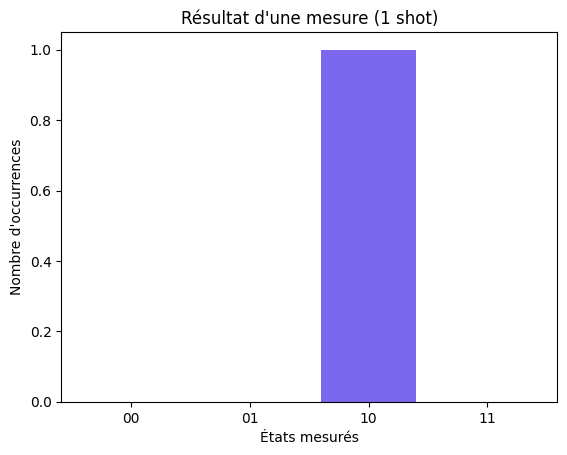

In [43]:
import pennylane as qml
import matplotlib.pyplot as plt

# Device 2 qubits, 1 shot
dev = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev)
def circuit(profondeur):
    portes = [qml.X(wires=1), qml.Z(wires=0), qml.H(wires=0), qml.Y(wires=1), qml.S(wires=0)]
    for i in range(profondeur):
        
    return qml.sample(wires=[0, 1])

result = circuit()
print("Résultat (1 shot) :", result)

# Visualisation simple façon PennyLane
states = ["00", "01", "10", "11"]
counts = [0, 0, 0, 0]
idx = int(result[0]) * 2 + int(result[1])
counts[idx] = 1

plt.bar(states, counts, color="mediumslateblue")
plt.xlabel("États mesurés")
plt.ylabel("Nombre d'occurrences")
plt.title("Résultat d'une mesure (1 shot)")
plt.show()

# Compilation et Transpilation dans PennyLane

Lorsque l’on souhaite exécuter un circuit quantique sur du matériel réel (ou un simulateur réaliste), il faut l’adapter à des contraintes physiques :  
- **Ensemble de portes limité** : seules certaines portes sont natives, les autres doivent être décomposées.
- **Connectivité des qubits** : toutes les paires de qubits ne sont pas connectées, il faut parfois insérer des SWAPs.
- **Optimisation** : il est important de réduire la profondeur et le nombre de portes pour limiter les erreurs.


## Compilation (`qml.compile`)
La **compilation** consiste à transformer et optimiser un circuit pour le simplifier ou le rendre compatible avec un jeu de portes donné.  
PennyLane propose le décorateur `@qml.compile` ou la fonction `qml.compile(...)` pour appliquer automatiquement un pipeline de transformations :
- Fusion de rotations,
- Annulation de portes inverses,
- Réorganisation des portes contrôlées, etc.

On peut aussi cibler un jeu de portes natif avec l’argument `basis_set`.

In [63]:
dev = qml.device('default.qubit', wires=[0, 1, 2])

@qml.compile
@qml.qnode(dev)
def circuit(x, y, z):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.RZ(z, wires=2)
    qml.CNOT(wires=[2, 1])
    qml.RX(z, wires=0)
    qml.CNOT(wires=[1, 0])
    qml.RX(x, wires=0)
    qml.CNOT(wires=[1, 0])
    qml.RZ(-z, wires=2)
    qml.RX(y, wires=2)
    qml.Y(wires=2)
    qml.CZ(wires=[1, 2])
    return qml.expval(qml.Z(wires=0))

print(qml.draw(circuit)(0.2, 0.3, 0.4))

0: ──H──RX(0.60)─────────────────┤  <Z>
1: ──H─╭X─────────────────────╭●─┤     
2: ──H─╰●─────────RX(0.30)──Y─╰Z─┤     


## Transpilation (`qml.transforms.transpile`)
La **transpilation** adapte un circuit à la topologie d’un matériel :  
- Respect de la connectivité (insertion de SWAPs),
- Réordonnancement des opérations,
- Décomposition selon un jeu de portes spécifiques.

PennyLane propose `qml.transforms.transpile`, et utilise la transpilation de Qiskit pour les devices IBM.

Imaginons le circuit suivant :

In [65]:
def circuit():
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[1, 3])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[0, 3])
    return qml.probs(wires=[0, 1, 2, 3])

qnode = qml.QNode(circuit, dev)
print(qml.draw(qnode)())

0: ─╭●──────────╭●─┤ ╭Probs
1: ─╰X─╭●─╭●────│──┤ ├Probs
2: ─╭●─│──╰X─╭●─│──┤ ├Probs
3: ─╰X─╰X────╰X─╰X─┤ ╰Probs


Et supposons un appareil dont la connectivité suit ce graphe :

```
0 --- 1
|     |
2 --- 3
```

On encode cette connectivité sous forme de liste d’arêtes, et on transpile :

In [64]:
def circuit():
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[1, 3])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[0, 3])
    return qml.probs(wires=[0, 1, 2, 3])

dev = qml.device("default.qubit", wires=[0, 1, 2, 3])
coupling_map = [(0, 1), (1, 3), (3, 2), (2, 0)]

transpiled_circuit = qml.transforms.transpile(circuit, coupling_map=coupling_map)
qnode = qml.QNode(transpiled_circuit, dev)

print(qml.draw(qnode)())

0: ─╭●────────────────╭●─┤ ╭Probs
1: ─╰X─╭●───────╭●────│──┤ ├Probs
2: ─╭●─│──╭SWAP─│──╭X─╰X─┤ ├Probs
3: ─╰X─╰X─╰SWAP─╰X─╰●────┤ ╰Probs


Pour plus de détails, voir la [documentation officielle PennyLane sur la compilation](https://docs.pennylane.ai/en/stable/introduction/compiling_circuits.html).

# Différentiation et Gradients

L’un des grands avantages de PennyLane est la possibilité de calculer automatiquement les **gradients** des circuits quantiques, ce qui est essentiel pour l’optimisation et l’apprentissage automatique quantique.

PennyLane permet de différencier les circuits par rapport à leurs paramètres, en utilisant différentes méthodes (analytique, numérique, ou via le backpropagation).


In [66]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=0)
    return qml.expval(qml.Z(0))

x = np.array(0.5, requires_grad=True)
grad_fn = qml.grad(circuit)
print("Gradient pour x=0.5 :", grad_fn(x))

Gradient pour x=0.5 : -0.479425538604203


## Pour aller plus loin

- [PennyLane – Differentiation](https://docs.pennylane.ai/en/stable/introduction/differentiation.html)


# Visualisation des Circuits dans PennyLane

Comprendre la structure d'un circuit quantique est essentiel pour le débogage et l'analyse. PennyLane offre plusieurs façons de visualiser vos circuits.


## Visualisation d'une fonction quantique ou d'un QNode

La manière la plus courante est de passer directement votre fonction quantique (ou un QNode déjà créé) aux fonctions de dessin.

*   **`qml.draw(circuit_function_or_qnode)` :** Génère une représentation textuelle (ASCII) du circuit.

*   **`qml.draw_mpl(circuit_function_or_qnode, style=..., decimals=...)` :** Crée un dessin graphique de haute qualité en utilisant Matplotlib.

### a) Fonction quantique simple

In [68]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def simple_circuit_func(phi, theta):
    qml.Hadamard(wires=0)
    qml.RX(phi, wires=0)
    qml.RY(theta, wires=1)
    qml.CNOT(wires=[0, 1])
    # Pas de return nécessaire si on ne dessine que la structure via la fonction
    # Mais un QNode aurait besoin d'un return qml.measurement(...)


Visualisation textuelle

In [ ]:
params_visu = [np.pi/2, np.pi/4]

# On appelle la fonction retournée par qml.draw avec les paramètres
text_drawing_func = qml.draw(simple_circuit_func)(*params_visu)
print(text_drawing_func)

0: ──H─────────RX(1.57)─╭●─┤  
1: ──RY(0.79)───────────╰X─┤  


**Visualisation Matplotlib**

`qml.draw_mpl` accepte des arguments pour personnaliser l'apparence :

*   **`style` :**
    *   `'default'` (par défaut) : Style coloré bleu.
    *   `'black_and_white'` : Style monochrome.
  
*   **`decimals` :** Nombre de décimales à afficher pour les valeurs des paramètres de portes (ex: angles de rotation).
*   


In [72]:

print("\n--- Dessin Matplotlib (qml.draw_mpl) du QNode ---")
fig, ax = qml.draw_mpl(simple_circuit_func)(*params_visu)
ax.set_title("Circuit Simple (via QNode)")
plt.show()


--- Dessin Matplotlib (qml.draw_mpl) du QNode ---


ImportError: Module matplotlib is required for ``MPLDrawer`` class. You can install matplotlib via 

   pip install matplotlib

### b) Visualisation QNode 

In [74]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def simple_qnode(phi, theta):
    simple_circuit_func(phi, theta) # Appelle la fonction pour le circuit
    return qml.expval(qml.PauliZ(0)) # Ajout de la mesure

print(qml.draw(simple_qnode)(*params_visu))

0: ──H─────────RX(1.57)─╭●─┤  <Z>
1: ──RY(0.79)───────────╰X─┤     


In [ ]:
fig, ax = qml.draw_mpl(simple_qnode)(*params_visu)
ax.set_title("Circuit Simple (via QNode)")
plt.show()


### Visualisation d'un `QuantumScript`

Un `QuantumScript` (ou `QuantumTape`) est une représentation bas niveau d'un circuit (une liste d'opérations et de mesures). Vous pouvez aussi le visualiser directement. 

*   **`qml.drawer.tape_text(tape, ...)` :** Pour une sortie textuelle.
*   **`qml.drawer.tape_mpl(tape, ...)` :** Pour une sortie Matplotlib.

In [75]:
# Créer une liste d'opérations
ops = [
    qml.Hadamard(wires=0),
    qml.RX(1.2345, wires=0),
    qml.CNOT(wires=[0, 1])
]
# Définir une mesure (même si non utilisée pour le dessin structurel)
measurements = [qml.expval(qml.PauliZ(0))]

# Créer le QuantumScript
qscript = qml.tape.QuantumScript(ops, measurements)

print(qml.drawer.tape_text(qscript))

0: ──H──RX─╭●─┤  <Z>
1: ────────╰X─┤     


In [76]:
fig, ax = qml.drawer.tape_mpl(qscript)
ax.set_title("Circuit via QuantumScript")
plt.show()

ImportError: Module matplotlib is required for ``MPLDrawer`` class. You can install matplotlib via 

   pip install matplotlib

## Pour aller plus loin :**

*   Documentation principale du module `qml.drawer` : [https://docs.pennylane.ai/en/stable/code/qml_drawer.html](https://docs.pennylane.ai/en/stable/code/qml_drawer.html)

*   Styles actuellement disponibles (détaillés dans la doc ci-dessus) : [Lien direct vers la section styles](https://docs.pennylane.ai/en/stable/code/qml_drawer.html#currently-available-styles)
